In [3]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [ ]:
#Medians by model_family
#work_dataset.groupby('model_family').median().apply(lambda s: s.apply(lambda x: format(round(x,1))))
#merged.groupby(['model_family','year','seller_country']).agg(np.random.choice).head(10)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df=pd.read_csv("out.c_testing_bucket.price_comparison.csv.gz",compression='gzip')



In [5]:
df = df[['seller_country','model_family','car_style','fuel_type','transmission','drive','year','cubic_capacity', 'power','mileage','equipment_position','days_on_stock','price_with_vat_czk']]
df=df.dropna()
df.shape

(1648859, 13)

In [280]:
#All dataset
SEMI=df[df['transmission']=='TRANSMISSION_SEMI_AUTOMATIC']#Semiautomatic
AUTO=df[df['transmission']=='TRANSMISSION_AUTOMATIC']#Automatic
MAN=df[df['transmission']=='TRANSMISSION_MANUAL']#Manual

#By country
#DE
DE_SEMI=df[(df['transmission']=='TRANSMISSION_SEMI_AUTOMATIC') & (df['seller_country']=='DE')]
DE_AUTO=df[(df['transmission']=='TRANSMISSION_AUTOMATIC') & (df['seller_country']=='DE')]
DE_MAN=df[(df['transmission']=='TRANSMISSION_MANUAL') & (df['seller_country']=='DE')]


#CZ
CZ_SEMI=df[(df['transmission']=='TRANSMISSION_SEMI_AUTOMATIC') & (df['seller_country']=='CZ')]
CZ_AUTO=df[(df['transmission']=='TRANSMISSION_AUTOMATIC') & (df['seller_country']=='CZ')]
CZ_MAN=df[(df['transmission']=='TRANSMISSION_MANUAL') & (df['seller_country']=='CZ')]

# give condition of price change to AUTO and MAN


In [273]:
CZ_SEMI.describe().apply(lambda s: s.apply(lambda x: format(round(x,1))))

,year,cubic_capacity,power,mileage,equipment_position,days_on_stock,price_with_vat_czk
count,45.0,45.0,45.0,45.0,45.0,45.0,45.0
mean,2012.6,2042.5,119.9,129968.6,0.6,49.6,350873.4
std,4.7,1192.8,79.9,97717.2,0.3,68.0,405466.6
min,2006.0,998.0,44.0,1.0,0.0,2.0,44990.0
25%,2009.0,1332.0,68.0,55000.0,0.3,9.0,96000.0
50%,2012.0,1598.0,100.0,95000.0,0.6,13.0,170000.0
75%,2017.0,1995.0,140.0,200498.0,0.8,55.0,430900.0
max,2021.0,6417.0,373.0,350000.0,1.0,288.0,2296000.0


<AxesSubplot:xlabel='transmission'>

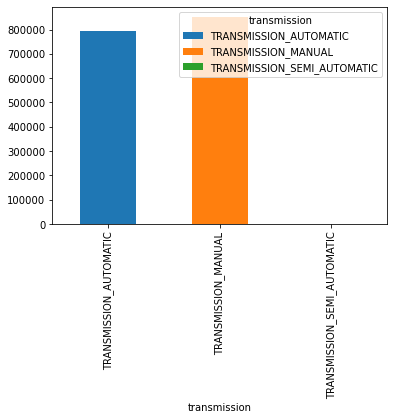

In [433]:
pd.crosstab(df['transmission'],df['transmission']).plot.bar(stacked=True)
#plt.yscale("log")

In [434]:
pd.crosstab(df['transmission'],df['transmission'])

transmission,TRANSMISSION_AUTOMATIC,TRANSMISSION_MANUAL,TRANSMISSION_SEMI_AUTOMATIC
transmission,,,
TRANSMISSION_AUTOMATIC,795730,0,0
TRANSMISSION_MANUAL,0,851631,0
TRANSMISSION_SEMI_AUTOMATIC,0,0,1498


In [435]:
#in percentage
pd.crosstab(df['transmission'],df['transmission']).apply(lambda r: round(((r/len(df))*100),2), axis=1)

transmission,TRANSMISSION_AUTOMATIC,TRANSMISSION_MANUAL,TRANSMISSION_SEMI_AUTOMATIC
transmission,,,
TRANSMISSION_AUTOMATIC,48.26,0.00,0.00
TRANSMISSION_MANUAL,0.00,51.65,0.00
TRANSMISSION_SEMI_AUTOMATIC,0.00,0.00,0.09


In [440]:
SEMI.describe().apply(lambda s: s.apply(lambda x: format((round(x,1)))))

,year,cubic_capacity,power,mileage,equipment_position,days_on_stock,price_with_vat_czk
count,1498.0,1498.0,1498.0,1498.0,1498.0,1498.0,1498.0
mean,2012.1,1542.2,101.9,81211.5,0.5,67.3,595392.2
std,4.3,1062.3,108.6,57324.5,0.3,70.1,1597495.2
min,2006.0,2.0,6.0,0.0,0.0,1.0,23521.0
25%,2008.0,999.0,51.0,36125.0,0.2,14.2,90299.0
50%,2011.0,999.0,62.0,79325.0,0.5,42.0,139068.0
75%,2016.0,1598.0,103.0,115774.0,0.8,97.0,377579.5
max,2021.0,6498.0,588.0,350000.0,1.0,360.0,21390808.0


In [441]:
AUTO.describe().apply(lambda s: s.apply(lambda x: format((round(x,1)))))

,year,cubic_capacity,power,mileage,equipment_position,days_on_stock,price_with_vat_czk
count,795730.0,795730.0,795730.0,795730.0,795730.0,795730.0,795730.0
mean,2016.5,2140.5,150.2,66693.2,0.6,78.1,798341.5
std,3.6,805.2,69.7,70127.8,0.3,74.7,1872599.4
min,2006.0,0.0,0.0,0.0,0.0,1.0,26.0
25%,2015.0,1598.0,110.0,12030.0,0.4,21.0,423464.2
50%,2017.0,1984.0,135.0,45323.0,0.7,55.0,659413.5
75%,2019.0,2191.0,173.0,100000.0,0.9,111.0,947578.2
max,2021.0,49980.0,3005.0,9000050.0,1.0,364.0,812487349.0


In [ ]:
#ADDITION (UPDATE)

In [282]:
CZ=pd.concat([CZ_SEMI, CZ_AUTO], ignore_index=True)['transmission'].value_counts()
DE=pd.concat([DE_SEMI, DE_AUTO], ignore_index=True)['transmission'].value_counts()

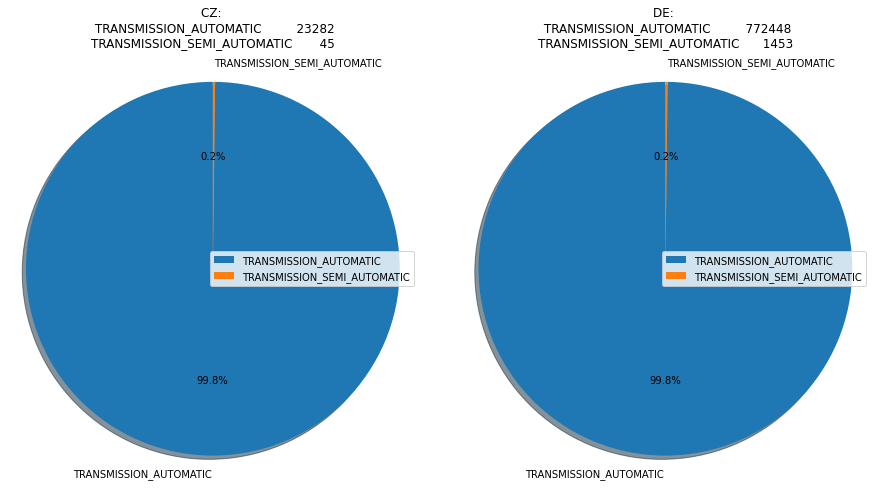

In [294]:
#Semi automatic (DE)
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(CZ, autopct='%1.1f%%',labels=CZ.index,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(loc=5, labels=CZ.index)
plt.title('CZ: \n {}'.format(CZ.to_string()))

ax2 = plt.subplot2grid((1,2),(0,1))
plt.pie(DE, autopct='%1.1f%%',labels=DE.index,
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.legend(loc=5, labels=DE.index)
plt.title('DE: \n {}'.format(DE.to_string()))

plt.subplots_adjust(left=0.1,wspace=0.1, hspace=1, right=None, top=0.5, bottom=0.1)


In [295]:
for x in [CZ,DE]: print(x)

TRANSMISSION_AUTOMATIC         23282
TRANSMISSION_SEMI_AUTOMATIC       45
Name: transmission, dtype: int64
TRANSMISSION_AUTOMATIC         772448
TRANSMISSION_SEMI_AUTOMATIC      1453
Name: transmission, dtype: int64


In [ ]:
#RANDOM SAMPLES creation WITH SAME SIZE OF SEMI AUTOMATIC SAMPLE

In [296]:
#One option to compare cars with automatic and semiautomatic transmissions is to check for similarities in characteristics 
#by merging two tables (AUTO and SEMI) on "model family" and "year"
merged=pd.merge(SEMI,AUTO,how='inner',on=['model_family','year','seller_country'])
merged=merged[["seller_country","model_family","transmission_x","transmission_y","year",'car_style_x','car_style_y','drive_x','drive_y','fuel_type_x','fuel_type_y','mileage_x','mileage_y','days_on_stock_x','days_on_stock_y','equipment_position_x','equipment_position_y','cubic_capacity_x','cubic_capacity_y','power_x','power_y','price_with_vat_czk_x','price_with_vat_czk_y']]
merged['mileage_diff']=merged['mileage_x']-merged['mileage_y']
merged['price_diff']=merged['price_with_vat_czk_x']-merged['price_with_vat_czk_y']
merged['power_diff']=merged['power_x']-merged['power_y']
merged['cubic_diff']=merged['cubic_capacity_x']-merged['cubic_capacity_y']
merged

,seller_country,model_family,transmission_x,transmission_y,year,car_style_x,car_style_y,drive_x,drive_y,fuel_type_x,...,cubic_capacity_x,cubic_capacity_y,power_x,power_y,price_with_vat_czk_x,price_with_vat_czk_y,mileage_diff,price_diff,power_diff,cubic_diff
0,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,140.0,140.0,783264,1148511,63486.0,-365247,0.0,0.0
1,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1984.0,140.0,185.0,783264,1062684,20513.0,-279420,-45.0,-16.0
2,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,140.0,140.0,783264,964801,45551.0,-181537,0.0,0.0
3,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1984.0,140.0,185.0,783264,1062684,20513.0,-279420,-45.0,-16.0
4,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,140.0,140.0,783264,1149090,61727.0,-365826,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527537,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,44.0,180406,177040,-28000.0,3366,11.0,0.0
527538,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,44.0,180406,156263,-51550.0,24143,11.0,0.0
527539,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,55.0,180406,130110,-37000.0,50296,0.0,0.0
527540,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,44.0,180406,156770,-11000.0,23636,11.0,0.0


In [ ]:
#random sample for "automat"
merged[["seller_country", "model_family","transmission_y","car_style_y","drive_y","fuel_type_y","mileage_y","days_on_stock_y","equipment_position_y","cubic_capacity_y","power_y","price_with_vat_czk_y"]].sample(n=len(SEMI), random_state=77)

In [ ]:
#random sample for "man"
merged=pd.merge(SEMI,MAN,how='inner',on=['model_family','year','seller_country'])
merged=merged[["seller_country","model_family","transmission_x","transmission_y","year",'car_style_x','car_style_y','drive_x','drive_y','fuel_type_x','fuel_type_y','mileage_x','mileage_y','days_on_stock_x','days_on_stock_y','equipment_position_x','equipment_position_y','cubic_capacity_x','cubic_capacity_y','power_x','power_y','price_with_vat_czk_x','price_with_vat_czk_y']]
merged['mileage_diff']=merged['mileage_x']-merged['mileage_y']
merged['price_diff']=merged['price_with_vat_czk_x']-merged['price_with_vat_czk_y']
merged['power_diff']=merged['power_x']-merged['power_y']
merged['cubic_diff']=merged['cubic_capacity_x']-merged['cubic_capacity_y']


In [ ]:
#MAN random

merged[["seller_country", "model_family","transmission_y","car_style_y","drive_y","fuel_type_y","mileage_y","days_on_stock_y","equipment_position_y","cubic_capacity_y","power_y","price_with_vat_czk_y"]].sample(n=len(SEMI), random_state=55)

In [ ]:
########################################################

In [356]:
merged=pd.merge(CZ_SEMI,CZ_AUTO,how='inner',on=['model_family','year','seller_country'])
merged=merged[["seller_country","model_family","transmission_x","transmission_y","year",'car_style_x','car_style_y','drive_x','drive_y','fuel_type_x','fuel_type_y','mileage_x','mileage_y','days_on_stock_x','days_on_stock_y','equipment_position_x','equipment_position_y','cubic_capacity_x','cubic_capacity_y','power_x','power_y','price_with_vat_czk_x','price_with_vat_czk_y']]
merged['mileage_diff']=merged['mileage_x']-merged['mileage_y']
merged['price_diff']=merged['price_with_vat_czk_x']-merged['price_with_vat_czk_y']
merged['power_diff']=merged['power_x']-merged['power_y']
merged['cubic_diff']=merged['cubic_capacity_x']-merged['cubic_capacity_y']
merged

,seller_country,model_family,transmission_x,transmission_y,year,car_style_x,car_style_y,drive_x,drive_y,fuel_type_x,...,cubic_capacity_x,cubic_capacity_y,power_x,power_y,price_with_vat_czk_x,price_with_vat_czk_y,mileage_diff,price_diff,power_diff,cubic_diff
0,CZ,MAKE_CITROEN-MODELFAMILY_GRAND_C4_PICASSO_SPAC...,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2008,CARSTYLE_OTHER,CARSTYLE_OTHER,DRIVE_4X2,DRIVE_4X2,FUELTYPE_DIESEL,...,1560.0,1560.0,80.0,80.0,60000,98990,121386.0,-38990,0.0,0.0
1,CZ,MAKE_CITROEN-MODELFAMILY_GRAND_C4_PICASSO_SPAC...,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2008,CARSTYLE_OTHER,CARSTYLE_OTHER,DRIVE_4X2,DRIVE_4X2,FUELTYPE_DIESEL,...,1560.0,1997.0,80.0,100.0,60000,119000,101000.0,-59000,-20.0,-437.0
2,CZ,MAKE_CITROEN-MODELFAMILY_GRAND_C4_PICASSO_SPAC...,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2008,CARSTYLE_OTHER,CARSTYLE_OTHER,DRIVE_4X2,DRIVE_4X2,FUELTYPE_DIESEL,...,1560.0,1560.0,80.0,80.0,60000,65000,60000.0,-5000,0.0,0.0
3,CZ,MAKE_PEUGEOT-MODELFAMILY_208,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2016,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,1199.0,1200.0,60.0,60.0,170000,230000,68902.0,-60000,0.0,-1.0
4,CZ,MAKE_PEUGEOT-MODELFAMILY_208,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2016,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,1199.0,1199.0,60.0,60.0,170000,269000,75000.0,-99000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,CZ,MAKE_SKODA-MODELFAMILY_KODIAQ,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SUV_OFFROAD,CARSTYLE_SUV_OFFROAD,DRIVE_4X2,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,110.0,140.0,749000,743000,14150.0,6000,-30.0,0.0
750,CZ,MAKE_SKODA-MODELFAMILY_KODIAQ,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SUV_OFFROAD,CARSTYLE_SUV_OFFROAD,DRIVE_4X2,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,110.0,140.0,749000,729900,-36000.0,19100,-30.0,0.0
751,CZ,MAKE_SKODA-MODELFAMILY_KODIAQ,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SUV_OFFROAD,CARSTYLE_SUV_OFFROAD,DRIVE_4X2,DRIVE_4X2,FUELTYPE_DIESEL,...,1968.0,1968.0,110.0,110.0,749000,659000,10800.0,90000,0.0,0.0
752,CZ,MAKE_SKODA-MODELFAMILY_KODIAQ,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SUV_OFFROAD,CARSTYLE_SUV_OFFROAD,DRIVE_4X2,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,110.0,110.0,749000,699000,7471.0,50000,0.0,0.0


In [309]:
#CZ:AVERAGE DIFFERENCE IN PRICE BETWEEN SEMI_AUTOMATIC AND AUTOMATIC 
merged[['price_diff']].describe().apply(lambda s: s.apply(lambda x: format(round(x,1))))
#In average, cars with automatic transmission are on 50k more expensive than with semiautomatic (Czech market)

,price_diff
count,754.0
mean,-55007.9
std,191676.7
min,-1464792.0
25%,-119000.0
50%,-38995.0
75%,38325.0
max,559000.0


In [310]:
#CZ: Each model, by each year
merged.groupby(['model_family','year']).mean('price_diff').head(10)

mileage_x  \
model_family                                       year              
MAKE_AUDI-MODELFAMILY_A4                           2006   350000.0   
MAKE_AUDI-MODELFAMILY_A7                           2013   165600.0   
MAKE_BMW-MODELFAMILY_335                           2006   216912.0   
MAKE_BMW-MODELFAMILY_520                           2015    59800.0   
MAKE_BMW-MODELFAMILY_X6                            2012   300000.0   
MAKE_BMW-MODELFAMILY_X7                            2020     8900.0   
MAKE_CITROEN-MODELFAMILY_C4_PICASSO                2008   265000.0   
                                                   2011   112650.0   
                                                   2013   194125.0   
MAKE_CITROEN-MODELFAMILY_GRAND_C4_PICASSO_SPACE... 2008   265000.0   

                                                             mileage_y  \
model_family                                       year                  
MAKE_AUDI-MODELFAMILY_A4                           2006  217542.125000   
MAKE_AUDI-MODELFAMILY_A7                           2013  200060.600000   
MAKE_BMW-MODELFAMILY_335                           2006  170000.000000   
MAKE_BMW-MODELFAMILY_520                           2015  131203.000000   
MAKE_BMW-MODELFAMILY_X6                            2012  157502.600000   
MAKE_BMW-MODELFAMILY_X7                            2020    5413.954545   
MAKE_CITROEN-MODELFAMILY_C4_PICASSO                2008  204908.800000   
                                                   2011  162274.333333   
                                                   2013  205000.000000   
MAKE_CITROEN-MODELFAMILY_GRAND_C4_PICASSO_SPACE... 2008  170871.333333   

                                                         days_on_stock_x  \
model_family                                       year                    
MAKE_AUDI-MODELFAMILY_A4                           2006             13.0   
MAKE_AUDI-MODELFAMILY_A7                           2013              9.0   
MAKE_BMW-MODELFAMILY_335                           2006              6.0   
MAKE_BMW-MODELFAMILY_520                           2015              6.0   
MAKE_BMW-MODELFAMILY_X6                            2012             13.0   
MAKE_BMW-MODELFAMILY_X7                            2020             49.0   
MAKE_CITROEN-MODELFAMILY_C4_PICASSO                2008             13.0   
                                                   2011             24.5   
                                                   2013             88.0   
MAKE_CITROEN-MODELFAMILY_GRAND_C4_PICASSO_SPACE... 2008             13.0   

                                                         days_on_stock_y  \
model_family                                       year                    
MAKE_AUDI-MODELFAMILY_A4                           2006        98.125000   
MAKE_AUDI-MODELFAMILY_A7                           2013        97.200000   
MAKE_BMW-MODELFAMILY_335                           2006        47.000000   
MAKE_BMW-MODELFAMILY_520                           2015        50.000000   
MAKE_BMW-MODELFAMILY_X6                            2012        65.200000   
MAKE_BMW-MODELFAMILY_X7                            2020        53.363636   
MAKE_CITROEN-MODELFAMILY_C4_PICASSO                2008        71.600000   
                                                   2011        31.000000   
                                                   2013        13.000000   
MAKE_CITROEN-MODELFAMILY_GRAND_C4_PICASSO_SPACE... 2008        22.666667   

                                                         equipment_position_x  \
model_family                                       year                         
MAKE_AUDI-MODELFAMILY_A4                           2006              0.779310   
MAKE_AUDI-MODELFAMILY_A7                           2013              0.077376   
MAKE_BMW-MODELFAMILY_335                           2006              0.977349   
MAKE_BMW-MODELFAMILY_520                           2015              0.753305   
MAKE_BMW-MODELF

In [ ]:
#######################

In [313]:
merged=pd.merge(DE_SEMI,DE_AUTO,how='inner',on=['model_family','year','seller_country'])
merged=merged[["seller_country","model_family","transmission_x","transmission_y","year",'car_style_x','car_style_y','drive_x','drive_y','fuel_type_x','fuel_type_y','mileage_x','mileage_y','days_on_stock_x','days_on_stock_y','equipment_position_x','equipment_position_y','cubic_capacity_x','cubic_capacity_y','power_x','power_y','price_with_vat_czk_x','price_with_vat_czk_y']]
merged['mileage_diff']=merged['mileage_x']-merged['mileage_y']
merged['price_diff']=merged['price_with_vat_czk_x']-merged['price_with_vat_czk_y']
merged['power_diff']=merged['power_x']-merged['power_y']
merged['cubic_diff']=merged['cubic_capacity_x']-merged['cubic_capacity_y']
merged

,seller_country,model_family,transmission_x,transmission_y,year,car_style_x,car_style_y,drive_x,drive_y,fuel_type_x,...,cubic_capacity_x,cubic_capacity_y,power_x,power_y,price_with_vat_czk_x,price_with_vat_czk_y,mileage_diff,price_diff,power_diff,cubic_diff
0,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,140.0,140.0,783264,1148511,63486.0,-365247,0.0,0.0
1,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1984.0,140.0,185.0,783264,1062684,20513.0,-279420,-45.0,-16.0
2,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,140.0,140.0,783264,964801,45551.0,-181537,0.0,0.0
3,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1984.0,140.0,185.0,783264,1062684,20513.0,-279420,-45.0,-16.0
4,DE,MAKE_AUDI-MODELFAMILY_Q5,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2017,CARSTYLE_SEDANS_SALOONS,CARSTYLE_SEDANS_SALOONS,DRIVE_4X4,DRIVE_4X4,FUELTYPE_DIESEL,...,1968.0,1968.0,140.0,140.0,783264,1149090,61727.0,-365826,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526783,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,44.0,180406,177040,-28000.0,3366,11.0,0.0
526784,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,44.0,180406,156263,-51550.0,24143,11.0,0.0
526785,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,55.0,180406,130110,-37000.0,50296,0.0,0.0
526786,DE,MAKE_SKODA-MODELFAMILY_CITIGO,TRANSMISSION_SEMI_AUTOMATIC,TRANSMISSION_AUTOMATIC,2013,CARSTYLE_COMPACT,CARSTYLE_COMPACT,DRIVE_4X2,DRIVE_4X2,FUELTYPE_PETROL,...,999.0,999.0,55.0,44.0,180406,156770,-11000.0,23636,11.0,0.0


In [314]:
#DE:AVERAGE DIFFERENCE IN PRICE BETWEEN SEMI_AUTOMATIC AND AUTOMATIC 
merged[['price_diff']].describe().apply(lambda s: s.apply(lambda x: format(round(x,1))))
#In average, cars with automatic transmission are on 11k more expensive than with semiautomatic (German market)

,price_diff
count,526788.0
mean,-10993.8
std,548489.9
min,-364590569.0
25%,-49527.0
50%,-13099.0
75%,23348.0
max,16196769.0


In [315]:
#DE: Each model, by each year
merged.groupby(['model_family','year']).mean('price_diff').head(10)

mileage_x      mileage_y  \
model_family                             year                             
MAKE_ABARTH-MODELFAMILY_500C             2010  156500.00  126150.000000   
                                         2011   32000.00   91629.777778   
                                         2012   79650.00   77880.545455   
MAKE_ABARTH-MODELFAMILY_595C             2015   37500.00   52450.000000   
                                         2020      16.25     197.551724   
MAKE_ABARTH-MODELFAMILY_595_COMPETIZIONE 2014   18700.00   60800.000000   
MAKE_ABARTH-MODELFAMILY_595_TURISMO      2012   11996.00   77000.000000   
                                         2014   44000.00   50993.000000   
MAKE_ABARTH-MODELFAMILY_695              2011   48788.00  101550.000000   
MAKE_ALFA_ROMEO-MODELFAMILY_GIULIA       2018   17500.00   54195.308824   

                                               days_on_stock_x  \
model_family                             year                    
MAKE_ABARTH-MODELFAMILY_500C             2010            62.00   
                                         2011            75.00   
                                         2012            64.00   
MAKE_ABARTH-MODELFAMILY_595C             2015           251.00   
                                         2020           123.75   
MAKE_ABARTH-MODELFAMILY_595_COMPETIZIONE 2014           184.00   
MAKE_ABARTH-MODELFAMILY_595_TURISMO      2012            15.00   
                                         2014            87.00   
MAKE_ABARTH-MODELFAMILY_695              2011           108.00   
MAKE_ALFA_ROMEO-MODELFAMILY_GIULIA       2018             4.00   

                                               days_on_stock_y  \
model_family                             year                    
MAKE_ABARTH-MODELFAMILY_500C             2010        36.000000   
                                         2011        57.000000   
                                         2012        94.727273   
MAKE_ABARTH-MODELFAMILY_595C             2015        53.000000   
                                         2020        72.068966   
MAKE_ABARTH-MODELFAMILY_595_COMPETIZIONE 2014       180.000000   
MAKE_ABARTH-MODELFAMILY_595_TURISMO      2012        23.000000   
                                         2014        28.000000   
MAKE_ABARTH-MODELFAMILY_695              2011        93.000000   
MAKE_ALFA_ROMEO-MODELFAMILY_GIULIA       2018        86.161765   

                                               equipment_position_x  \
model_family                             year                         
MAKE_ABARTH-MODELFAMILY_500C             2010              0.460981   
                                         2011              0.426966   
                                         2012              0.533333   
MAKE_ABARTH-MODELFAMILY_595C             2015              0.792593   
                                         2020              0.611473   
MAKE_ABARTH-MODELFAMILY_595_COMPETIZIONE 2014              0.680000   
MAKE_ABARTH-MODELFAMILY_595_TURISMO      2012              0.733333   
                                         2014              0.019608   
MAKE_ABARTH-MODELFAMILY_695              2011              0.142857   
MAKE_ALFA_ROMEO-MODELFAMILY_GIULIA       2018              0.320051   

                                               equipment_position_y  \
model_family                             year                         
MAKE_ABARTH-MODELFAMILY_500C             2010              0.076087   
                                         2011              0.509886   
                                         2012              0.667722   
MAKE_ABARTH-MODELFAMILY_595C             2015              0.531481   
                                         2020              0.764014   
MAKE_ABARTH-MODELFAMILY_595_COMPETIZIONE 2014              0.040000   
MAKE_ABARTH-MODELFAMILY_595_TURISMO      2012              0.066667   
                                         2014              0.392157 

In [ ]:
#Graphical representations

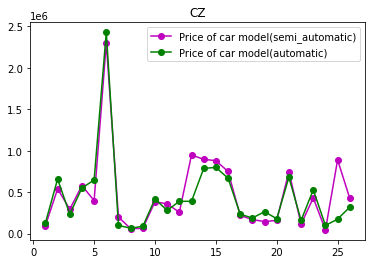

In [358]:
#CZ price comparison
xy = merged.groupby(['model_family']).agg(np.random.choice)

x = xy['price_with_vat_czk_x'].values#semi_automatic
y = xy['price_with_vat_czk_y'].values#automatic
z=range(1,27)

plt.plot(z, x,'mo-', label ='Price of car model(semi_automatic)' )
plt.plot(z, y,'go-', label ='Price of car model(automatic)' )
plt.title("CZ")
plt.legend()

In [351]:
#DE price comparison
xy = merged.groupby(['model_family']).agg(np.random.choice)

x = xy['price_with_vat_czk_x'].values#semi_automatic
y = xy['price_with_vat_czk_y'].values#automatic
z=range(1,209)

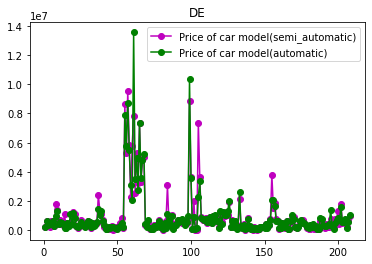

In [353]:
plt.plot(z, x,'mo-', label ='Price of car model(semi_automatic)' )
plt.plot(z, y,'go-', label ='Price of car model(automatic)' )
plt.title("DE")
plt.legend()

In [ ]:
#Random iteration

In [150]:
a = merged.groupby(['model_family',]).agg(np.random.choice)['price_diff'].values

In [265]:
b=np.zeros((1,191))
i=1
for i in range(100):
    a = merged.groupby(['model_family',]).agg(np.random.choice)['price_diff'].values
    b=np.concatenate((b,np.reshape(a,(1,191))))
    

In [266]:
pd.DataFrame(b.T).iloc[:, 1:]

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,82710.0,-1872.0,82710.0,-234740.0,11149.0,24519.0,24519.0,-234740.0,45604.0,24519.0,...,11149.0,-5968.0,-5968.0,45604.0,-234740.0,-1872.0,24519.0,11149.0,45604.0,-1872.0
1,103943.0,278921.0,105634.0,241875.0,13770.0,-44928.0,84361.0,100675.0,-721.0,97179.0,...,116427.0,-67788.0,-91060.0,139415.0,27529.0,101209.0,-61897.0,4647.0,111723.0,-26578.0
2,136744.0,177751.0,177751.0,132632.0,177751.0,177751.0,132632.0,132632.0,177751.0,177751.0,...,177751.0,177751.0,92894.0,92894.0,132632.0,136744.0,132632.0,177751.0,132632.0,132632.0
3,28396.0,-45976.0,-34944.0,-34944.0,-89779.0,-51296.0,28396.0,-34944.0,-45976.0,-45976.0,...,-6979.0,-45976.0,28396.0,-45976.0,28396.0,-89779.0,-89779.0,28396.0,-51296.0,-89779.0
4,14000.0,6100.0,14000.0,9010.0,6001.0,11000.0,14000.0,-9000.0,9010.0,6010.0,...,-9000.0,-9000.0,11000.0,6100.0,-6000.0,6100.0,6001.0,-6000.0,11000.0,6001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,217873.0,283072.0,39574.0,63963.0,59202.0,236522.0,174082.0,23489.0,232860.0,141916.0,...,181415.0,50128.0,215652.0,-3553.0,253630.0,125885.0,93866.0,108691.0,-4823.0,184671.0
187,-85726.0,-26371.0,-28189.0,54152.0,-50282.0,23385.0,-15729.0,-8364.0,70954.0,162832.0,...,-19209.0,25675.0,86757.0,70954.0,54955.0,27430.0,103819.0,101830.0,-19498.0,16144.0
188,-25050.0,112919.0,50202.0,155322.0,52235.0,-43789.0,34406.0,163676.0,15301.0,77394.0,...,235593.0,117011.0,30381.0,77394.0,235593.0,152550.0,9247.0,40778.0,104083.0,155797.0
189,62205.0,77065.0,50237.0,60076.0,-10762.0,18328.0,71869.0,-41010.0,43236.0,52919.0,...,57853.0,30921.0,-34461.0,105053.0,21850.0,9805.0,53589.0,-8251.0,53013.0,66969.0


In [ ]:
#From this approach it is noticed that some patterns between two auto groups does exist.Nonetheless, the decision of replacement
#is rather subjective, because it depends on circumstances on which the decisionmaker this replacement would apply.  

In [ ]:
#------------------------- UPDATE FINISH

In [445]:
#Then using the table above, each category will be compared for similarity and output will be percentage of similarities.
#Based on this comparison, we can say if percentage of similarities between of two transmission characteristics is high,
#then it is reasonable to conclude that two transmission categories could be set as one category.
#For example:
((merged['car_style_x']==merged['car_style_y'])&(merged['fuel_type_x']==merged['fuel_type_y'])&   
(merged['drive_x']==merged['drive_y'])&(merged['power_x']==merged['power_y'])).value_counts()
#However, since this method is manual and distributions of "AUTO" and "SEMI" are quite different, 
#using this method is not efficient.

False    397911
True     147158
dtype: int64

In [ ]:
#One of the efficient ways to determine the similarities is by using scatter plots:

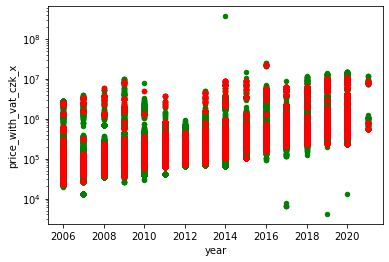

In [448]:
#scatter plot of car prices by semiautomatic and automatic transmission
#green dots: automatic transmission
#red dots: semiautomatic transmission
ax1 = merged.plot(kind='scatter', x='year', y='price_with_vat_czk_y', color='g')#automatic
ax2 = merged.plot(kind='scatter', x='year', y='price_with_vat_czk_x', color='r', ax=ax1)  #semi-automatic
plt.yscale("log")


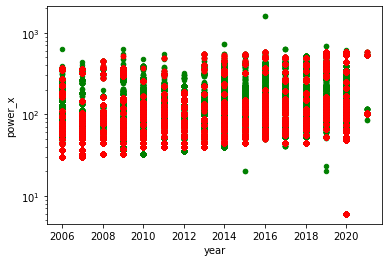

In [449]:
#scatter plot of car engine power
ax1 = merged.plot(kind='scatter', x='year', y='power_y', color='g')#automatic
ax2 = merged.plot(kind='scatter', x='year', y='power_x', color='r', ax=ax1)  #semi-automatic
plt.yscale("log")

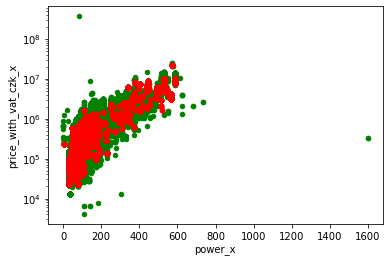

In [450]:
ax1 = merged.plot(kind='scatter', x='power_y', y='price_with_vat_czk_y', color='g')#automatic
ax2 = merged.plot(kind='scatter', x='power_x', y='price_with_vat_czk_x', color='r', ax=ax1)  #semi-automatic
plt.yscale("log")

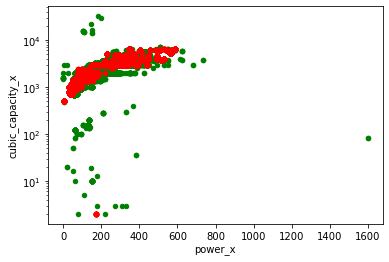

In [452]:
ax1 = merged.plot(kind='scatter', x='power_y', y='cubic_capacity_y', color='g')#automatic
ax2 = merged.plot(kind='scatter', x='power_x', y='cubic_capacity_x', color='r', ax=ax1)  #semi-automatic
plt.yscale("log")

In [ ]:
#The scatter plots above shows that such car features (points) like price by year, power by price, cubic capasity by power
# of semiautomatic transmission car are merging(fitting) with corresponding points of automatic transmission cars.
# This indicates the similarity of two transmissions according to given dataset.

In [ ]:
#2. Cluster analysis

In [ ]:
#The cluster approach can be also employed as another method. The purpose of cluster analysis is to figure out, whether "AUTO" 
# and "SEMI" are in the same cluster or in different clusters.

In [461]:
#Clustering by categorical variables: model_family, power, fuel, etc.
#The first step is to "equalize" the sample size by setting the same size of each "AUTO", "SEMI", "MAN"
#Since "SEMI" has the lowest sample size, same sample sizes for "AUTO" and "MAN" will be generated randomly.

AUTO=AUTO.sample(n=len(SEMI), random_state=77)
MAN=MAN.sample(n=len(SEMI), random_state=11)
dataset=pd.concat([AUTO,MAN,SEMI]).sample(frac=1)


In [463]:
len(dataset)

4494

In [464]:
#coding categories (0,1)
cat_code=pd.get_dummies(dataset[['model_family','car_style','fuel_type','transmission','drive']],drop_first=True)

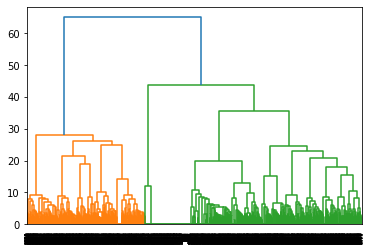

In [465]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(cat_code,'ward','euclidean')
dn=dendrogram(link)

In [ ]:
#On the dendrogram it seems that there are 2 (or 3) clusters of categorical data.
#Similarly we can build dandrogram of continuos variables and then check if the number of clusters will be the same as for cat.data.

In [ ]:
#Dendogram of hierarchical approach

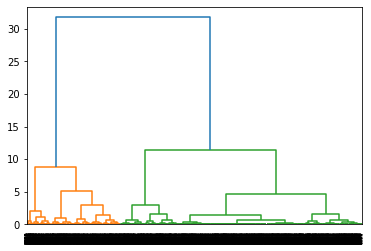

In [466]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize

cont_code=dataset[['year','cubic_capacity', 'power','mileage','equipment_position','days_on_stock','price_with_vat_czk']]

data_scaled=normalize(cont_code)
data_scaled=pd.DataFrame(data_scaled, columns=cont_code.columns)
dendogram= sch.dendrogram(sch.linkage(data_scaled, method="ward")) 

In [467]:
#Clusters (2 clusters will be chosen as proposed by dendrogram)
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(data_scaled)

In [482]:
#First cluster
dataset['clusters']=y_hc
dataset[dataset['clusters']==0]['transmission'].value_counts()

TRANSMISSION_AUTOMATIC         1363
TRANSMISSION_MANUAL            1064
TRANSMISSION_SEMI_AUTOMATIC     812
Name: transmission, dtype: int64

In [483]:
#Second cluster
dataset[dataset['clusters']==1]['transmission'].value_counts()

TRANSMISSION_SEMI_AUTOMATIC    686
TRANSMISSION_MANUAL            434
TRANSMISSION_AUTOMATIC         135
Name: transmission, dtype: int64

In [ ]:
#K means clustering

In [484]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y_km=km.fit_predict(data_scaled)

In [487]:
dataset['clusters']=y_km
dataset[dataset['clusters']==0]['transmission'].value_counts()

TRANSMISSION_AUTOMATIC         1334
TRANSMISSION_MANUAL            1005
TRANSMISSION_SEMI_AUTOMATIC     768
Name: transmission, dtype: int64

In [488]:
dataset[dataset['clusters']==1]['transmission'].value_counts()

TRANSMISSION_SEMI_AUTOMATIC    730
TRANSMISSION_MANUAL            493
TRANSMISSION_AUTOMATIC         164
Name: transmission, dtype: int64

In [490]:
#Clustering on mixed data(cat.and cont.)
dataset.columns

Index(['model_family', 'car_style', 'fuel_type', 'transmission', 'drive',
       'year', 'cubic_capacity', 'power', 'mileage', 'equipment_position',
       'days_on_stock', 'price_with_vat_czk', 'clusters'],
      dtype='object')

In [491]:
mark_array=dataset.values
mark_array[:, 5]=mark_array[:, 5].astype(float)
mark_array[:, 10]=mark_array[:, 10].astype(float)
mark_array[:, 11]=mark_array[:, 11].astype(float)


In [ ]:
kproto = KPrototypes(n_clusters=2, max_iter=1000,verbose=2)
clusters=kproto.fit_predict(mark_array, categorical=[0,1,2,3,4])

In [496]:
dataset['clusters']=clusters
dataset[dataset['clusters']==0]['transmission'].value_counts()

TRANSMISSION_MANUAL            1498
TRANSMISSION_AUTOMATIC         1493
TRANSMISSION_SEMI_AUTOMATIC    1438
Name: transmission, dtype: int64

In [497]:
dataset['clusters']=clusters
dataset[dataset['clusters']==1]['transmission'].value_counts()

TRANSMISSION_SEMI_AUTOMATIC    60
TRANSMISSION_AUTOMATIC          5
Name: transmission, dtype: int64

In [ ]:
#Conclusion: Scatter plots and cluster analysis results provide information that based on available dataset technical car features
#and price do not depend on transmission type. Cars with different transmissions may have similar feautures and can be included in one cluster(or group)
